# Week4 - Lab

Take a look at these toy datasets. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

### Implementing the above operations on first data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv', index_col=0)
#data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv', index_col=0)

### viewing the head of the dataset

In [2]:
data1.head()

,X,y
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240


### checking whether there are any missing values

In [3]:
data1.isnull().sum()

X    0
y    0
dtype: int64

### reshaping the dependent and independent variables to make it easy to use for training the model

In [4]:
X = np.array(data1['X']).reshape(-1,1)
y = np.array(data1['y']).reshape(-1,1)

X.shape, y.shape

((100, 1), (100, 1))

### Train test split with a ratio of 80:20

In [5]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')


Training samples: 80
Test samples: 20


### Using simple model for training the dataset

In [6]:
# Fit the training dataset into the simple model

import statsmodels.api as smf
simpleModel = smf.OLS(X_training, y_training).fit()
print(simpleModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.047e+04
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                   5.66e-104
Time:                        22:27:23   Log-Likelihood:                         -193.87
No. Observations:                  80   AIC:                                      389.7
Df Residuals:                      79   BIC:                                      392.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
# Fit the testing dataset into the simple model

import statsmodels.api as smf
simpleModel = smf.OLS(X_test, y_test).fit()
print(simpleModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              8734.
Date:                Tue, 26 Sep 2023   Prob (F-statistic):                    9.02e-27
Time:                        22:27:23   Log-Likelihood:                         -47.833
No. Observations:                  20   AIC:                                      97.67
Df Residuals:                      19   BIC:                                      98.66
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Predicting the y value using the simple model and also the residuals

**Plot actual versus predicted values**

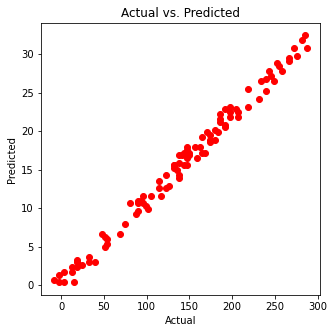

In [8]:
yhat = simpleModel.predict(X)

resid = y - yhat

plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

### Plot predicted versus residuals values

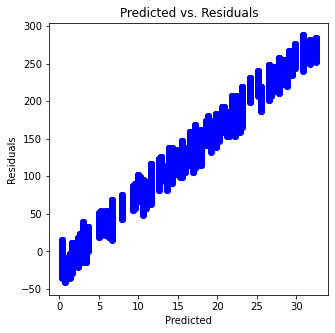

In [9]:
plt.figure(figsize=(5,5))
plt.plot(yhat, resid, 'bo')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs. Residuals')
plt.show()

### Get the r-squared score for this simple model 

In [10]:
simpleModel.rsquared

0.9978292357027361

**From the above implementation of code, I can say that predicted values are very close to actual values. From the above cell, it can be found that the R-squared value is also high. By this, I can say that this is a better for this dataset.**

## Training data1 using linear regression model

**Train and test split is already done in the top cells**

In [11]:
from sklearn.linear_model import LinearRegression #Import the libraries for linear regression

In [12]:
# Fit the training dataset using linear regression model

model = LinearRegression()
model.fit(X_training,y_training)

LinearRegression()

In [13]:
# Predict the y value

y_predictions = model.predict(X_test)

In [14]:
y_predictions

array([[186.90961321],
       [153.75308582],
       [114.56809891],
       [277.33650608],
       [141.69616677],
       [183.89538345],
       [226.09460012],
       [180.88115368],
       [102.51117986],
       [111.55386915],
       [ 54.28350366],
       [204.99499178],
       [132.65347748],
       [265.27958703],
       [ 24.14120604],
       [165.81000487],
       [208.00922155],
       [ 57.29773342],
       [ 90.45426081],
       [204.99499178]])

**Calculate the mean_squared_error, root mean squared error and R^2 score for this dataset**

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predictions)
mse

78.0456428848972

In [16]:
rmse = np.sqrt(mse)
rmse

8.834344507935901

In [17]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predictions)
r2

0.9818654019640373

### Plot actual versus predicted values

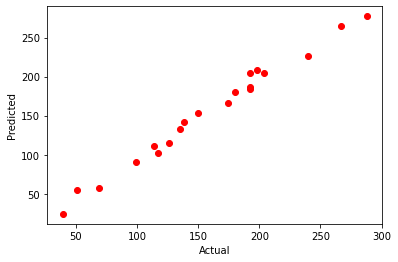

In [18]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Plot residual values versus predicted values

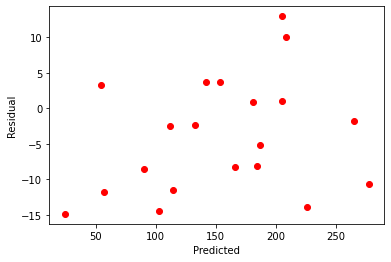

In [19]:
plt.plot(y_predictions, y_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

**From the above code implementation of linear regression model on the dataset, I can say that this is best fit for this data. The evaluations are equal to 0.98 which is very good accuracy to fit the model. The plot also suggests that predicted values are very close to actual values. There are also not a lot of residuals which tells that this model fits the data. (negative residual states that predicted value is high and positive in turn states that predicted value is low)**

## Implementing the same things above on data2 dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv', index_col=0)

In [21]:
data2.head() # view the head of the dataset

,X1,X2,y
0,50,B,2510
1,82,B,6738
2,66,B,4355
3,35,A,2225
4,81,A,7560


In [22]:
data2.isnull().sum() # check the missing values

X1    0
X2    0
y     0
dtype: int64

In [23]:
data2['X2'].unique() # find the unique values of X2 because it seems to be categorical column

array(['B', 'A'], dtype=object)

### Create dummies for X2 column to make it easy for the model to fit in the dataset

In [24]:
# create dummies for X2 Column
dummy_variables = pd.get_dummies(data2['X2'], prefix='X2')

# Concatenate the dummy variables with the original Dataset
data2 = pd.concat([data2, dummy_variables], axis=1)

# Drop the original 'X2' column 
data2 = data2.drop('X2', axis=1)

print(data2)


    X1     y  X2_A  X2_B
0   50  2510     0     1
1   82  6738     0     1
2   66  4355     0     1
3   35  2225     1     0
4   81  7560     1     0
..  ..   ...   ...   ...
95  98  9615     0     1
96   9  1066     1     0
97  56  4139     1     0
98  50  2502     0     1
99  53  3815     1     0

[100 rows x 4 columns]


### Divide the above columns into dependent and independent variables

In [25]:
y = data2.y # dependent variable

features = ['X1','X2_A','X2_B'] # independent features
X = data2[features]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      100 non-null    int64
 1   X2_A    100 non-null    uint8
 2   X2_B    100 non-null    uint8
dtypes: int64(1), uint8(2)
memory usage: 1.8 KB


### Train and test split

In [26]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 80
Test samples: 20


In [27]:
X_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 27 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      80 non-null     int64
 1   X2_A    80 non-null     uint8
 2   X2_B    80 non-null     uint8
dtypes: int64(1), uint8(2)
memory usage: 1.4 KB


In [28]:
# import the required libraries for linear regression
from sklearn.linear_model import LinearRegression

In [29]:
# Fit the dataset into the model
model = LinearRegression()
model.fit(X_training,y_training)

LinearRegression()

In [30]:
#predict the y values
y_predictions = model.predict(X_test)

In [31]:
y_predictions

array([ 398.28294721, 3490.55248059, 1711.70600482, 1430.83550865,
       4517.71689109, 2551.62341787, 5641.19887579,  960.02393956,
       6767.37493595, 3490.55248059, 2367.07049589, 5173.08138216,
        211.03594976, 7420.04535156, 7700.91584773, 5079.45788344,
       -350.70504259,  307.35352395, 4330.46989364, 4145.91697166])

### Evaluate the model

In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predictions)
mse

466235.1509085203

In [33]:
rmse = np.sqrt(mse)
rmse

682.8141408234897

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predictions)
r2

0.9229274898768963

### Plot actual versus predicted values

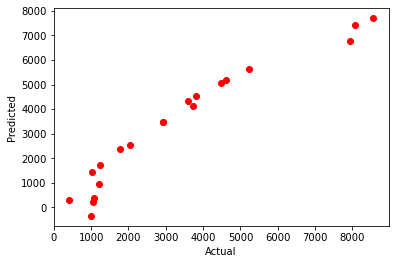

In [35]:
import matplotlib.pyplot as plt

plt.plot(y_test, y_predictions, 'ro')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Plot residuals versus predicted values

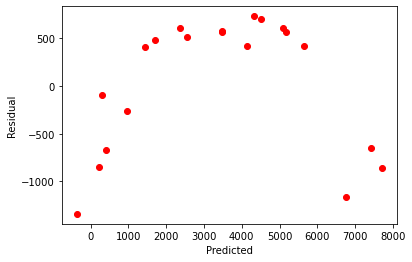

In [36]:
plt.plot(y_predictions, y_predictions - y_test, 'ro')
plt.ylabel('Residual')
plt.xlabel('Predicted')
plt.show()

**From the above code implementation of linear regression model on the dataset, I can say that this is best fit for this data. The evaluations are equal to 0.92 which is very good accuracy to make this model a good fit for this dataset. The plot also suggests that predicted values are very close to actual values. There are also not a lot of residuals which tells that this model fits the data. (negative residual states that predicted value is high and positive in turn states that predicted value is low). Creation of dummy also contributes to the accuracy of the model.**